# Introduction

Naive Bayes is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. Naive Bayes assume that the input features are independent of the presence of any other features. 

Naive Bayes model is a simple model and specially useful for very large data sets. One advantage of Naive Bayes is that it outperform even highly sophisticated classification methods.

## Naive Bayes Classifier Implementation

This notebook will demonstrate an application of Naive Bayes Classifier on the [Hawk](https://github.com/ppunia74/INDE-577_Fall2022/blob/main/SupervisedLearning/7%20-%20naive%20bayes%20classifier/Data/Hawks.csv) dataset.

In [1]:
#Always include important imports at the top
import numpy as np 
import pandas as pd
import time

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn imports
from itertools import combinations
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report #for nice result formatting
from sklearn.metrics import roc_curve, roc_auc_score


## Pre-Processing
Before we can run Naive Bayes Classifier, we need to pre-process the data and encode labels. We will do this using sklearn's preprocessing package.

In [2]:
# Import Hawks dataset
hawks = pd.read_csv("Data/Hawks.csv")

In [3]:
hawks.head()

,Month,Day,Year,CaptureTime,ReleaseTime,BandNumber,Species,Age,Sex,Wing,Weight,Culmen,Hallux,Tail,StandardTail,Tarsus,WingPitFat,KeelFat,Crop
0,9,19,1992,13:30,NaN,877-76317,RT,I,NaN,385.0,920.0,25.7,30.1,219,NaN,NaN,NaN,NaN,NaN
1,9,22,1992,10:30,,877-76318,RT,I,NaN,376.0,930.0,NaN,NaN,221,NaN,NaN,NaN,NaN,NaN
2,9,23,1992,12:45,,877-76319,RT,I,NaN,381.0,990.0,26.7,31.3,235,NaN,NaN,NaN,NaN,NaN
3,9,23,1992,10:50,,745-49508,CH,I,F,265.0,470.0,18.7,23.5,220,NaN,NaN,NaN,NaN,NaN
4,9,27,1992,11:15,,1253-98801,SS,I,F,205.0,170.0,12.5,14.3,157,NaN,NaN,NaN,NaN,NaN


In [4]:
# Remove the NaN values in the five features that are used from the dataset
hawks = hawks.dropna(subset = ['Wing', 'Weight', 'Culmen', 'Hallux', 'Tail'])

In [5]:
hawks.shape

(891, 19)

After removing the NaN values from the dataset, the dataset has 891 rows and 19 columns.

The following columns are used in this notebook: 

* Species: CH=Cooper's, RT=Red-tailed, SS=Sharp-Shinned
* Wing: Length (in mm) of primary wing feather from tip to wrist it attaches to
* Weight: Body weight (in gm)
* Culmen: Length (in mm) of the upper bill from the tip to where it bumps into the fleshy part of the bird
* Hallux: Length (in mm) of the killing talon
* Tail: Measurement (in mm) related to the length of the tail (invented at the MacBride Raptor Center)


Text(0.5, 1.0, 'Hawks Species Data')

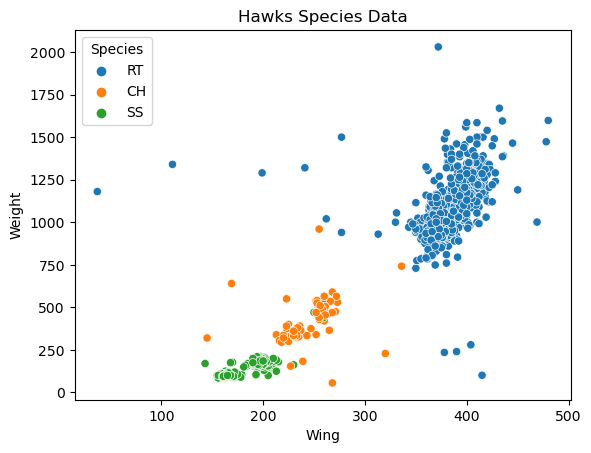

In [6]:
sns.scatterplot(data = hawks, x = "Wing", y = "Weight", hue = 'Species').set_title("Hawks Species Data")

Text(0.5, 1.0, 'Hawks Species Data')

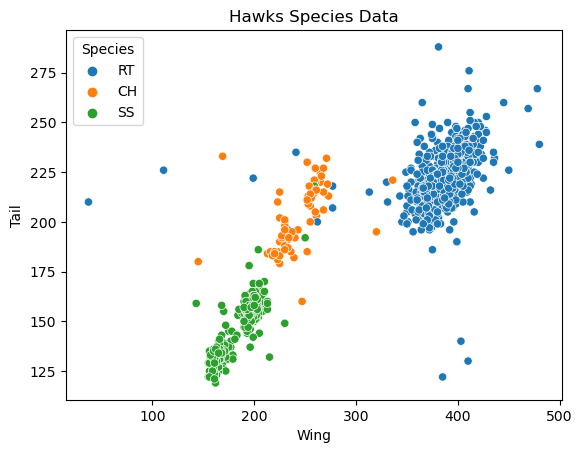

In [7]:
sns.scatterplot(data = hawks, x = "Wing", y = "Tail", hue = 'Species').set_title("Hawks Species Data")

To have a more intuitive view of the data, generate scatter plots between for any 2 features I am interested in.

In [8]:
# Get pairwise features list of the dataset
pick_features = hawks.columns[9:14]
L = list(x for x in combinations(pick_features, 2))

In [9]:
# Check the list of pairwise features
L

[('Wing', 'Weight'),
 ('Wing', 'Culmen'),
 ('Wing', 'Hallux'),
 ('Wing', 'Tail'),
 ('Weight', 'Culmen'),
 ('Weight', 'Hallux'),
 ('Weight', 'Tail'),
 ('Culmen', 'Hallux'),
 ('Culmen', 'Tail'),
 ('Hallux', 'Tail')]

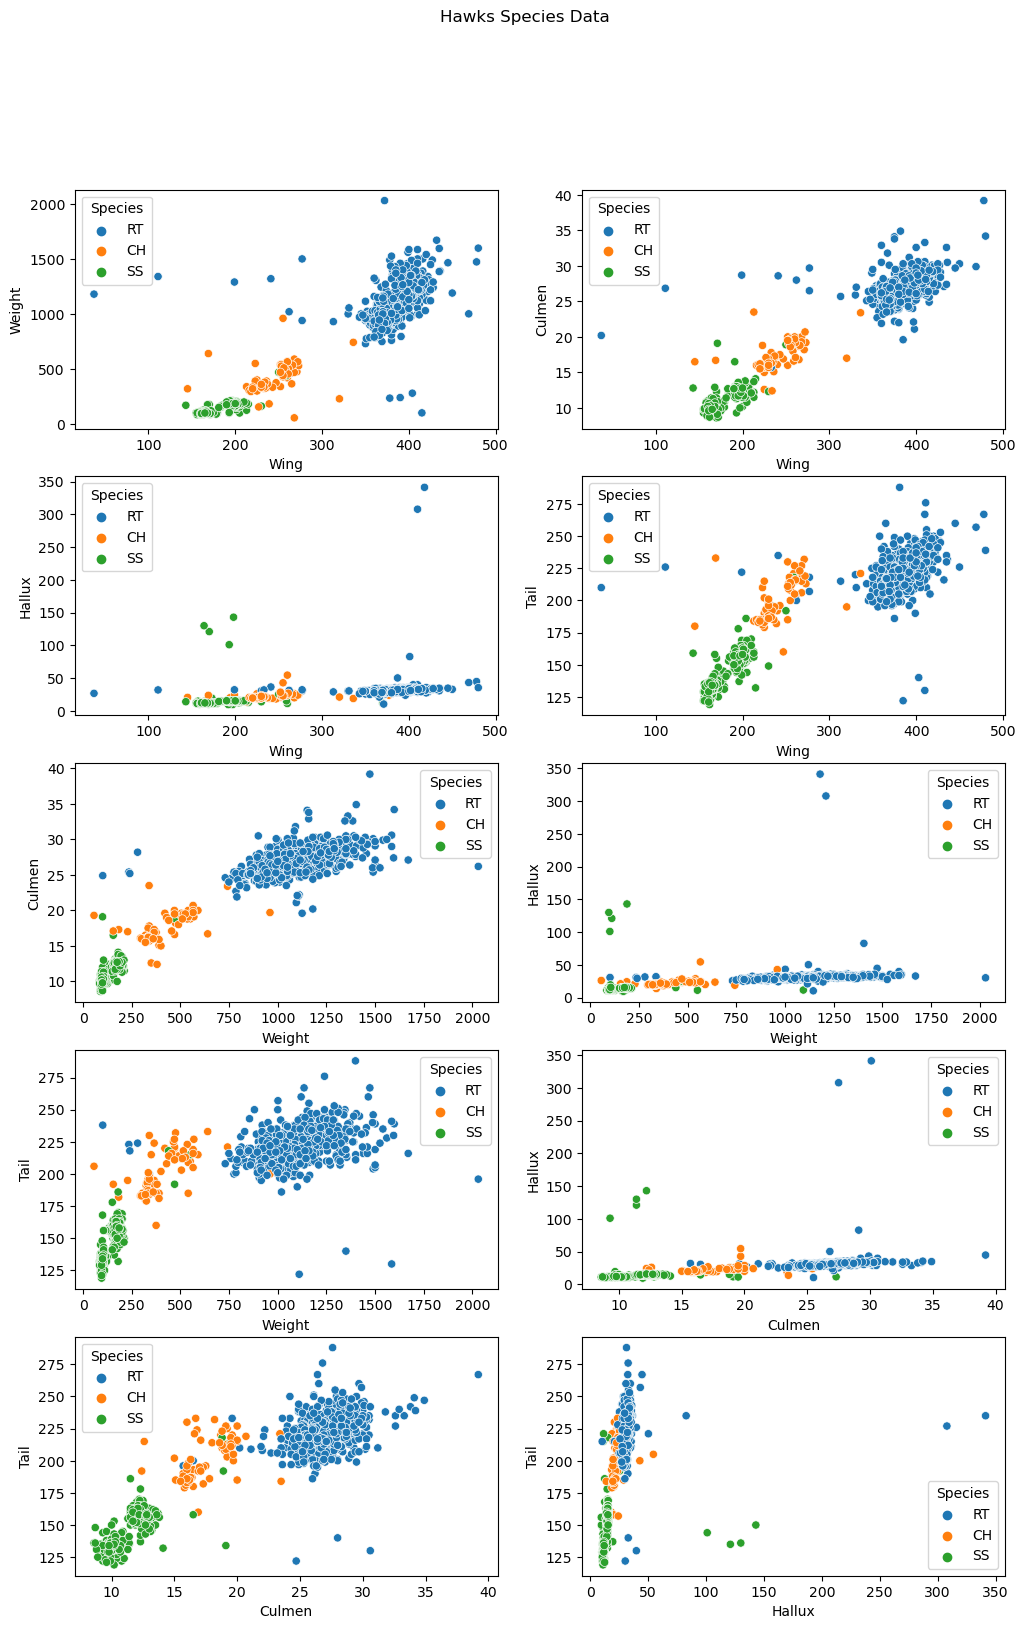

In [10]:
# Plot an overall scatter points between any 2 feature measures
fig, ax = plt.subplots(nrows = 5, 
                       ncols = 2,
                       figsize = (12, 18))

for p, q in zip(L, [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1), (4, 0), (4, 1)]):
    sns.scatterplot(data = hawks, x = p[0] , y = p[1], hue = 'Species', ax = ax[q])

fig.suptitle('Hawks Species Data')
plt.show()

**Inference**: From the above scatter plots, Wing vs. Tail classify the data into three classes. And thus, I **choose Wing and Tail as the features** to predict the classification of Hawks species.

---

### Train and Test Data Split

## Split into Train and Test data
To apply logistic regression, the data must be split into "training" and "test" data.

In [11]:
# Extract out desired features from Hawks Dataset, and covert features to numpy array
X = hawks[['Wing',
           'Tail']].to_numpy()

# Extract out labels, and convert labels to numpy array
y = hawks['Species'].to_numpy()

In [12]:
# Use the train_test_split function in sklearn package
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.33,
                                                   random_state = 20) # like set.seed in R

In [13]:
#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 40)

In [14]:
start = time.time()

#Instantiate the model
nb = GaussianNB()
#Fit the model with data
nb.fit(X_train,y_train)

end = time.time()
nb_time = end-start
print('Train Time (seconds) of Naive Bayes without PCA:',nb_time)

y_pred_nb = nb.predict(X_test)

Train Time (seconds) of Naive Bayes without PCA: 0.0


# Performance Analysis
The next step is to conduct a performance analysis of the model. We do this by examining the confusion matrix and the Receiver Operating Characteristic (ROC) curve.

In [15]:
print("Accuracy:", accuracy_score(y_test,y_pred_nb))

Accuracy: 0.9865470852017937


Text(0.5, 427.9555555555555, 'Predicted label')

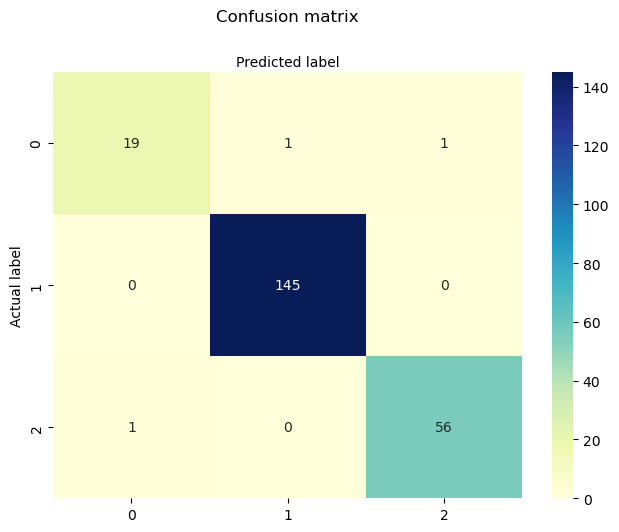

In [16]:
#Creating the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_nb)
class_names=[0,1, 2] # name  of classes

#Creating the figure
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Adding the heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [17]:
#Print a nicely formatted report
classify_nb = classification_report(y_test, y_pred_nb)
print("\nClassification Report")
print(classify_nb)


Classification Report
              precision    recall  f1-score   support

          CH       0.95      0.90      0.93        21
          RT       0.99      1.00      1.00       145
          SS       0.98      0.98      0.98        57

    accuracy                           0.99       223
   macro avg       0.98      0.96      0.97       223
weighted avg       0.99      0.99      0.99       223

